# Question 4
Which Belgian festival has the most artists on stage?

# 1. Import Required Libraries

In [8]:
# Import the 'json' module to handle JSON data in Python.
# This module allows you to work with JSON files, parse data, and convert between JSON and Python data structures (e.g., dictionaries, lists).
import json

# Import 'matplotlib.pyplot' as plt, a module for creating visualizations in Python.
# 'pyplot' provides functions to create a wide range of static, animated, and interactive plots.
import matplotlib.pyplot as plt


# 2. Load Festival Data from JSON Files
We start by defining a function that loads the data from the festival JSON files. Each file contains information about the artists performing each year at the festival.


In [9]:
# Define a function to load data from a JSON file
def load_json(filename):
    # Open the file in read mode ('r')
    with open(filename, 'r') as file:
        # Use json.load() to parse the JSON content from the file
        # and return it as a Python data structure (e.g., dictionary, list, etc.)
        return json.load(file)


# 3. Find the Maximum Number of Artists for a Given Festival
Next, we define a function that identifies the maximum number of artists for each year at a specific festival. The function returns the highest number of artists and the year they performed.


In [10]:
# Define a function to find the maximum number of artists for a given festival
def find_max_artists(festival_data):
    # Initialize a variable to keep track of the maximum number of artists found
    max_artists = 0
    
    # Initialize a variable to store the year corresponding to the maximum number of artists
    year_with_max_artists = None
    
    # Iterate over the festival data, where 'year' is the key and 'artists' is the list of artists for that year
    for year, artists in festival_data.items():
        # Count the number of artists in the list for this year
        artist_count = len(artists)
        
        # If the current artist count is greater than the previous maximum, update the maximum and the year
        if artist_count > max_artists:
            max_artists = artist_count
            year_with_max_artists = int(year)  # Convert the year to an integer for consistency
    
    # Return the maximum number of artists and the year in which it occurred
    return max_artists, year_with_max_artists


# 4. Find the Festival with the Most Artists
We now define a function that iterates over all festivals to find which one had the most artists in a single year. It will also return the year in which the maximum number of artists performed.


In [11]:
# Define a function to analyze all festivals and find the one with the most artists
def find_festival_with_most_artists(festivals):
    # Initialize a variable to track the overall maximum number of artists across all festivals
    max_artists_overall = 0
    
    # Initialize a variable to store the name of the festival with the most artists
    festival_with_max_artists = None
    
    # Initialize a variable to store the year when the maximum number of artists occurred
    year_of_max_artists = None
    
    # Dictionary to store the maximum number of artists for each festival
    max_artists_per_festival = {}

    # Iterate over each festival and its data
    for festival_name, festival_data in festivals.items():
        # Find the maximum number of artists and the year for the current festival
        max_artists, year = find_max_artists(festival_data)
        
        # Store the maximum number of artists for the current festival
        max_artists_per_festival[festival_name] = max_artists

        # If the current festival has more artists than the previous overall maximum, update the overall maximum
        if max_artists > max_artists_overall:
            max_artists_overall = max_artists
            festival_with_max_artists = festival_name  # Store the name of the festival with the most artists
            year_of_max_artists = year  # Store the year with the most artists for this festival

    # Return the festival with the most artists, the number of artists, the year of maximum artists,
    # and a dictionary with the max artists per festival
    return festival_with_max_artists, max_artists_overall, year_of_max_artists, max_artists_per_festival


# 5. Load Festival Data
Now, we load the data from the three festival JSON files: `rockwerchter_festival.json`, `pokkelpop_festival.json`, and `graspop_festival.json`. These files contain the information we need to analyze.


In [12]:
# Load JSON data from the 'rockwerchter_festival.json' file and assign it to the 'rockwerchter' variable
rockwerchter = load_json("rockwerchter_festival.json")

# Load JSON data from the 'pokkelpop_festival.json' file and assign it to the 'pokkelpop' variable
pokkelpop = load_json("pokkelpop_festival.json")

# Load JSON data from the 'graspop_festival.json' file and assign it to the 'graspop' variable
graspop = load_json("graspop_festival.json")


# 6. Analyze the Festivals
We now use the `find_festival_with_most_artists` function to identify which festival has the most artists performing in a single year, and the year in which this occurred. 


In [13]:
# Create a dictionary to store the data for each festival
# The keys are the festival names, and the values are the festival data loaded from JSON files
festivals = {
    "Rock Werchter": rockwerchter,  # Rock Werchter festival data
    "Pokkelpop": pokkelpop,        # Pokkelpop festival data
    "Graspop": graspop             # Graspop festival data
}

# Call the function 'find_festival_with_most_artists' to analyze the festivals and find the one with the most artists
# This function returns the name of the festival, the maximum number of artists, the year of the maximum artists,
# and a dictionary with the maximum artists per festival
festival, max_artists, year, max_artists_per_festival = find_festival_with_most_artists(festivals)

# Print the name of the festival with the most artists, the number of artists, and the year they performed
print(f"The Belgian festival with the most artists on stage is {festival}, "
      f"with {max_artists} artists performing in the year {year}.")


The Belgian festival with the most artists on stage is Pokkelpop, with 271 artists performing in the year 2022.


# 7. Visualize the Maximum Number of Artists for Each Festival
We will now visualize the comparison of the maximum number of artists across the festivals using a bar chart. Each festival will be represented by a bar, showing the number of artists it had in its peak year.


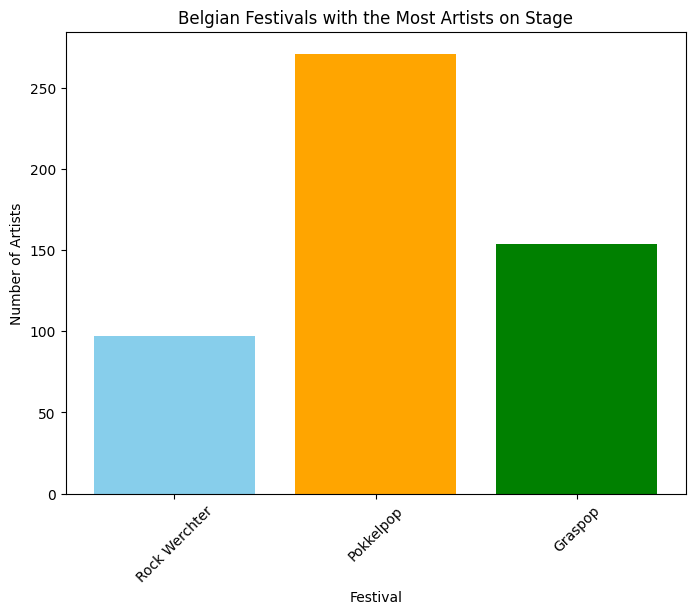

In [14]:
# Define a function to visualize the maximum number of artists for each festival using a bar chart
def plot_max_artists_comparison(max_artists_per_festival):
    # Extract the festival names (keys) from the dictionary
    festivals = list(max_artists_per_festival.keys())
    
    # Extract the maximum number of artists (values) from the dictionary
    artists_count = list(max_artists_per_festival.values())

    # Create a figure for the plot with a specified size (width 8, height 6)
    plt.figure(figsize=(8, 6))
    
    # Create a bar chart using the festivals as the x-axis and artists_count as the y-axis
    # Assign different colors to the bars for better distinction
    plt.bar(festivals, artists_count, color=['skyblue', 'orange', 'green'])
    
    # Add a title to the plot
    plt.title('Belgian Festivals with the Most Artists on Stage')
    
    # Label the x-axis as 'Festival'
    plt.xlabel('Festival')
    
    # Label the y-axis as 'Number of Artists'
    plt.ylabel('Number of Artists')
    
    # Rotate the x-axis labels (festival names) by 45 degrees for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

# Call the function to plot the comparison using the max_artists_per_festival data
plot_max_artists_comparison(max_artists_per_festival)
